# Linear Regression 

### libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle 
import os 
from matplotlib import pyplot as plt 
from PIL import Image
import cv2 
import tensorflow as tf

In [2]:
path_to_datasets = '/Users/saskia/unibe19/master_thesis/TKI_project/fluo_datasets/' 
saving_path = '/Users/saskia/unibe19/master_thesis/TKI_project/report/figures'

### import feature vectors

In [3]:
c0 = pickle.load(open(os.path.join(path_to_datasets, "c0.pckl"), "rb"))

## when channel images are preprocessed and downscaled

### channel 1

In [4]:
c1 = pickle.load(open(os.path.join(path_to_datasets, "c1_preprocess.pckl"), "rb"))

In [5]:
model1 = LinearRegression().fit(c0, c1)

In [6]:
r_sq = model1.score(c0, c1) 
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.11968242016250363


In [7]:
pred = model1.predict(c0)

Text(0, 0.5, 'predicted pixels')

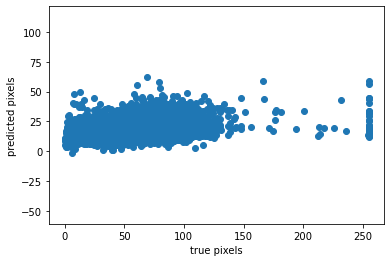

In [38]:
plt.scatter(c1, pred)
plt.axis('equal') #'square' 
plt.xlabel("true pixels")
plt.ylabel("predicted pixels")
plt.savefig(os.path.join(saving_path, ''))

### channel 2

In [9]:
c2 = pickle.load(open(os.path.join(path_to_datasets, "c2_preprocess.pckl"), "rb"))

model2 = LinearRegression().fit(c0, c2)

r_sq = model2.score(c0, c2) 
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.11445321645018636


(-10.65, 267.65, 9.518977737426757, 142.40144004821778)

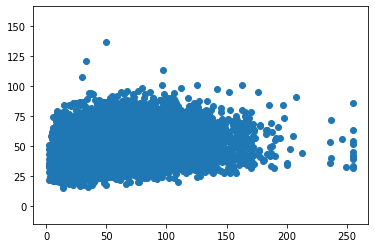

In [12]:
pred = model2.predict(c0)
plt.scatter(c2, pred)
plt.axis('equal') #'square'

### channel 3

In [13]:
c3 = pickle.load(open(os.path.join(path_to_datasets, "c3_preprocess.pckl"), "rb"))

model3 = LinearRegression().fit(c0, c3)

r_sq = model3.score(c0, c3) 
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.06152577149927396


(-10.65, 267.65, -6.144419288635254, 89.43634662628173)

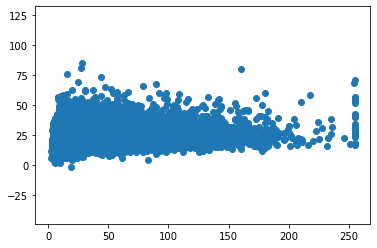

In [14]:
pred = model3.predict(c0)
plt.scatter(c3, pred)
plt.axis('equal') #'square'

## when channel images are only downscaled

### channel 1

In [15]:
c1 = pickle.load(open(os.path.join(path_to_datasets, "c1_onlyResized32.pckl"), "rb"))

In [16]:
model1 = LinearRegression().fit(c0, c1)

In [17]:
r_sq = model1.score(c0, c1) 
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.24138543168816073


In [18]:
pred = model1.predict(c0)

(-12.75, 267.75, -9.130862426757812, 138.65317077636718)

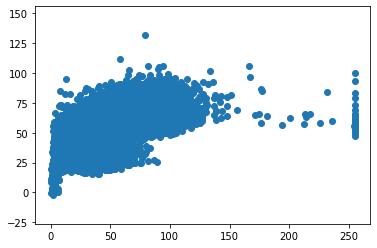

In [19]:
plt.scatter(c1, pred)
plt.axis('equal') #'square'

### channel 2

In [20]:
c2 = pickle.load(open(os.path.join(path_to_datasets, "c2_onlyResized32.pckl"), "rb"))

model2 = LinearRegression().fit(c0, c2)

r_sq = model2.score(c0, c2) 
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.11330119287730911


(-11.700000000000001, 267.7, 7.069964599609375, 102.94291381835937)

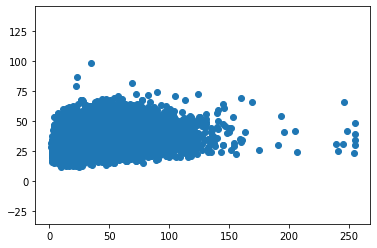

In [21]:
pred = model2.predict(c0)
plt.scatter(c2, pred)
plt.axis('equal') #'square'

### channel 3

In [22]:
c3 = pickle.load(open(os.path.join(path_to_datasets, "c3_onlyResized32.pckl"), "rb"))

model3 = LinearRegression().fit(c0, c3)

r_sq = model3.score(c0, c3) 
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.06193533016460717


(-10.65, 267.65, -4.747796154022216, 65.38364706039428)

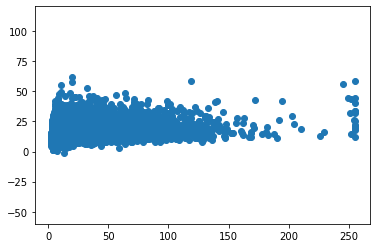

In [23]:
pred = model3.predict(c0)
plt.scatter(c3, pred)
plt.axis('equal') #'square'

## plot Flr_i vs Flr_i_hat

In [24]:
path_to_preprocess_channel_images = "/Users/saskia/unibe19/master_thesis/TKI_project/data/preprocess_channel_images/flow/single_z"

In [26]:
# upload the model
models_path = '/Users/saskia/unibe19/master_thesis/TKI_project/UBELIX/models/'
model = tf.keras.models.load_model(os.path.join(models_path, '78_3c_l2Normalize_lrelu_bestEpoch.h5'))

# extract trained layers that we need
model.layers.pop(0)
new_model = tf.keras.Sequential()
new_model.add(tf.keras.Input(shape=(None, None, 1)))  # change input dim
for layer in model.layers[1:-2]:  # -2 -> third last layer as output
    new_model.add(layer)

2022-09-12 16:29:12.647489: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### NS

In [28]:
path_to_new_frames = '/Volumes/tki/EngelhardtGroup/Saskia/data/exported_frames'
main_dir_path = os.path.join(path_to_new_frames, "flow/single_z")

img = Image.open(os.path.join(main_dir_path, "11", 'c000_t009_z000.png'))

# convert image to numpy array
data = np.asarray(img)

# get feature map
feature_map = new_model.predict(data[None, :, :, None])

fv = feature_map.reshape(-1, feature_map.shape[-1])

2022-09-12 16:31:12.225944: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [29]:
np.shape(feature_map), fv.shape

((1, 47, 64, 64), (3008, 64))

In [30]:
pred_c1 = model1.predict(fv)

In [31]:
pred_c1.shape

(3008, 1)

In [32]:
max(pred_c1)

array([91.90837], dtype=float32)

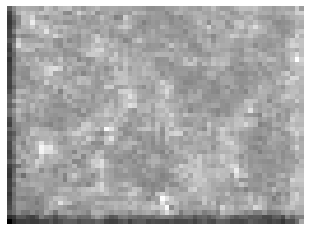

In [33]:
plt.axis("off")
plt.imshow(np.reshape(pred_c1, feature_map.shape[1:3]), cmap = 'gray')

In [34]:
img32 = cv2.resize(data, None, fx=1 / 32, fy=1 / 32, interpolation = cv2.INTER_AREA)

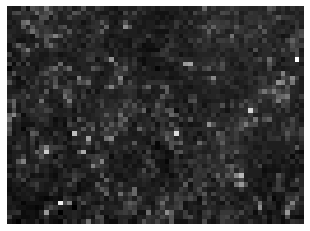

In [35]:
plt.axis("off")
plt.imshow(img32, cmap = 'gray')